<a href="https://colab.research.google.com/github/Souvik2biswas/TaskManager/blob/main/SUN1CYCLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/monthlySSA.csv')

In [103]:
data

,DATE,Area
0,1874-05-01,365.1
1,1874-06-01,415.2
2,1874-07-01,1033.5
3,1874-08-01,954.1
4,1874-09-01,335.3
...,...,...
1783,2022-12-01,1326.4
1784,2023-01-01,1846.2
1785,2023-02-01,1278.5
1786,2023-03-01,1013.2


In [104]:
data['DATE']=pd.to_datetime(data['DATE'])
data=data.set_index('DATE')

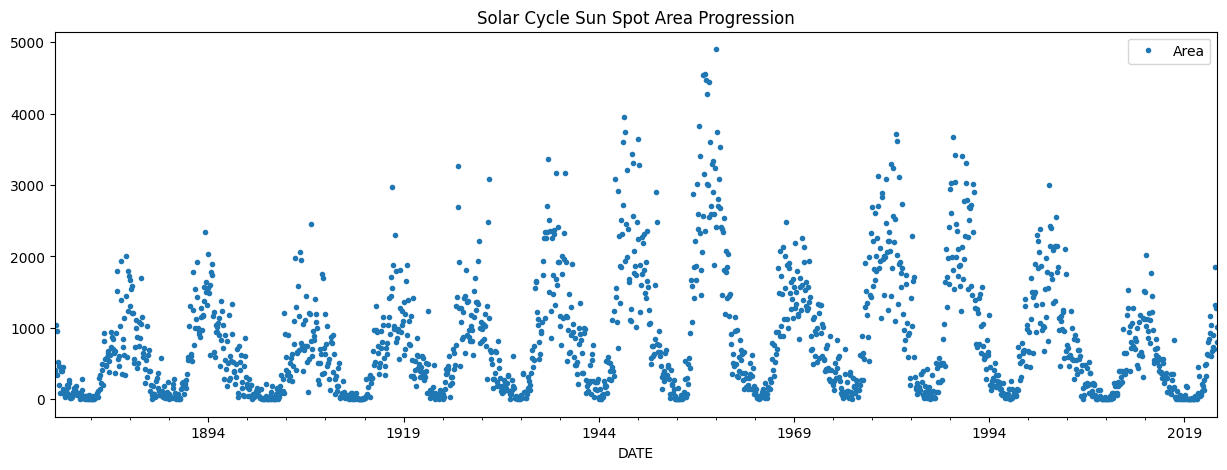

In [105]:
data.plot(style='.',
        figsize=(15, 5),
        title='Solar Cycle Sun Spot Area Progression')
plt.show()

In [106]:
data

,Area
DATE,
1874-05-01,365.1
1874-06-01,415.2
1874-07-01,1033.5
1874-08-01,954.1
1874-09-01,335.3
...,...
2022-12-01,1326.4
2023-01-01,1846.2
2023-02-01,1278.5


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1788 entries, 1874-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    1788 non-null   float64
dtypes: float64(1)
memory usage: 27.9 KB


<Axes: title={'center': 'Peaks'}, xlabel='DATE'>

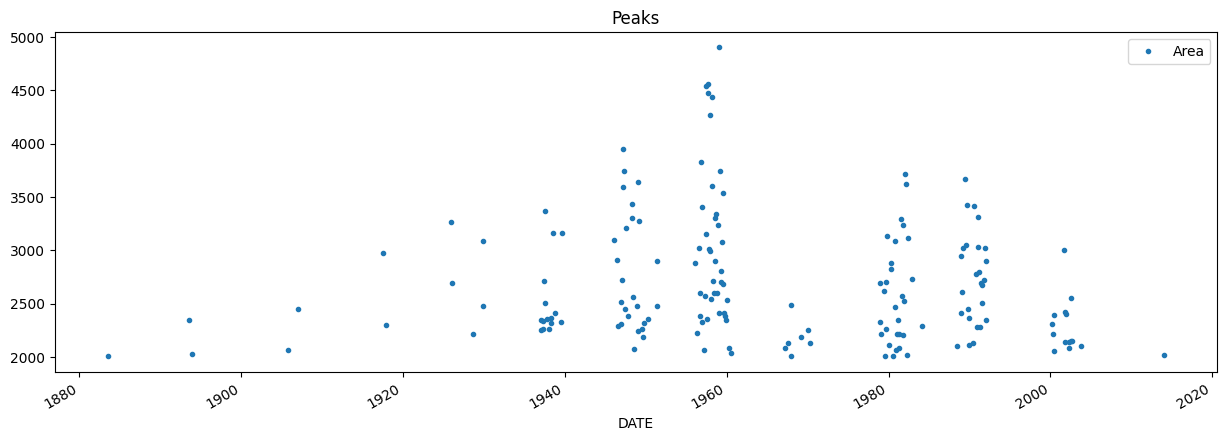

In [108]:
data.query('Area > 2_000')\
    .plot(style='.',
          figsize=(15, 5),
          title='Peaks')

In [109]:
data.query('Area == 0')

,Area
DATE,
1878-08-01,0.0
1879-02-01,0.0
1879-03-01,0.0
1889-11-01,0.0
1900-12-01,0.0
1901-04-01,0.0
1901-08-01,0.0
1901-12-01,0.0
1902-04-01,0.0


In [110]:
data.query('Area < 100')

,Area
DATE,
1875-01-01,89.8
1875-07-01,76.8
1875-09-01,34.0
1875-12-01,91.0
1876-04-01,15.8
...,...
2020-09-01,0.9
2020-10-01,91.7
2021-01-01,63.7


<Axes: title={'center': 'Peaks'}, xlabel='DATE'>

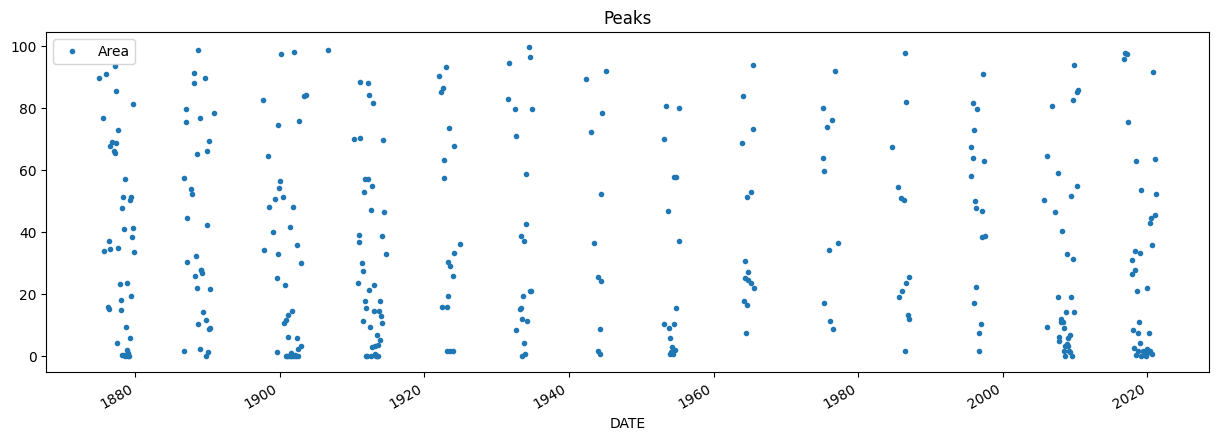

In [113]:
data.query('Area < 100') \
    .plot(style='.',
          figsize=(15, 5),
          title='Peaks')

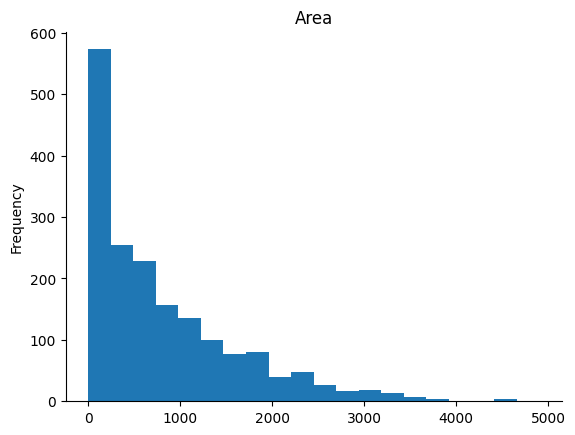

In [114]:
from matplotlib import pyplot as plt
data['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

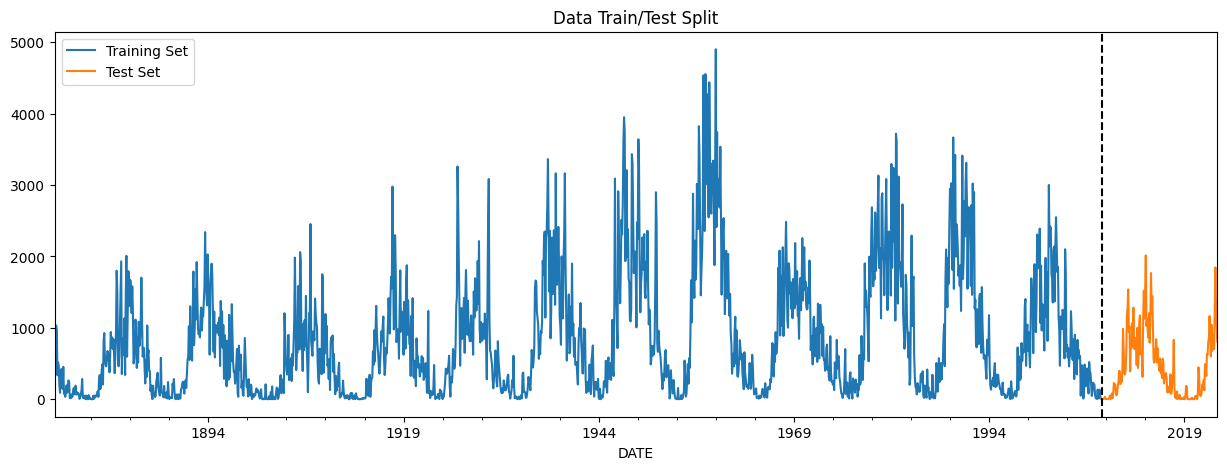

In [118]:
train_scaled = data.loc[data.index < '2008-06-01']
test_scaled = data.loc[data.index >= '2008-06-01']
fig, ax = plt.subplots(figsize=(15, 5))
train_scaled.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_scaled.plot(ax=ax, label='Test Set')
ax.axvline('2008-06-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [119]:
train_scaled

,Area
DATE,
1874-05-01,365.1
1874-06-01,415.2
1874-07-01,1033.5
1874-08-01,954.1
1874-09-01,335.3
...,...
2008-01-01,12.2
2008-02-01,11.1
2008-03-01,133.2


In [120]:
def prepare_data(timeseries_data, n_steps):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_steps
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [121]:
n_steps=96
X,y=prepare_data(train_scaled['Area'],n_steps)
val_X,val_y=prepare_data(test_scaled['Area'],n_steps)

In [122]:
X.shape

(1513, 96)

In [123]:
val_X.shape

(83, 96)

In [128]:
X

array([[ 365.1,  415.2, 1033.5, ...,  673.1,  928.9, 1799.1],
       [ 415.2, 1033.5,  954.1, ...,  928.9, 1799.1, 1519.6],
       [1033.5,  954.1,  335.3, ..., 1799.1, 1519.6,  557.8],
       ...,
       [2306.4, 1834. , 2216.1, ...,  135.9,   12.2,   11.1],
       [1834. , 2216.1, 2055.2, ...,   12.2,   11.1,  133.2],
       [2216.1, 2055.2, 2389.5, ...,   11.1,  133.2,   40.6]])

In [125]:
param_grid = {
    'bootstrap': [True, False],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 3, 4, 5],
    'warm_start': [True, False]
}


In [126]:
rfr_model = RandomForestRegressor(criterion='squared_error')

In [127]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 3, 4, 5],
                         'n_estimators': [50, 100, 200, 300],
                         'warm_start': [True, False]},
             scoring='neg_mean_squared_error')

In [129]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [130]:
predictions = best_model.predict(val_X).reshape(-1,1)

In [131]:
predictions

array([[ 527.40333333],
       [ 539.88433333],
       [ 448.62933333],
       [ 468.14966667],
       [ 408.83866667],
       [ 353.45066667],
       [ 305.66833333],
       [ 225.38366667],
       [ 231.99633333],
       [ 198.737     ],
       [ 172.91533333],
       [ 319.38933333],
       [ 147.03033333],
       [ 160.384     ],
       [ 230.31633333],
       [ 291.42566667],
       [ 345.909     ],
       [ 197.19      ],
       [ 138.96466667],
       [ 102.48166667],
       [ 147.21333333],
       [ 112.452     ],
       [ 141.93433333],
       [  66.10733333],
       [  78.51266667],
       [  57.67866667],
       [  78.832     ],
       [  81.92966667],
       [  34.74933333],
       [  39.45866667],
       [  49.30066667],
       [  48.863     ],
       [  40.08166667],
       [  66.53866667],
       [  49.52233333],
       [ 153.352     ],
       [ 150.04033333],
       [  30.31066667],
       [  43.69433333],
       [  42.432     ],
       [  57.033     ],
       [  58.538

In [132]:
rmse = np.sqrt(MSE(predictions,val_y))

In [133]:
rmse

173.5802101487527

In [134]:
from sklearn.metrics import r2_score as R2
R2_score=R2(predictions,val_y)
R2_score

0.7621741470809852

In [135]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(predictions, val_y)
MAPE

0.6011508678441261

In [136]:
train_predict = best_model.predict(X).reshape(-1,1)
test_predict = best_model.predict(val_X).reshape(-1,1)

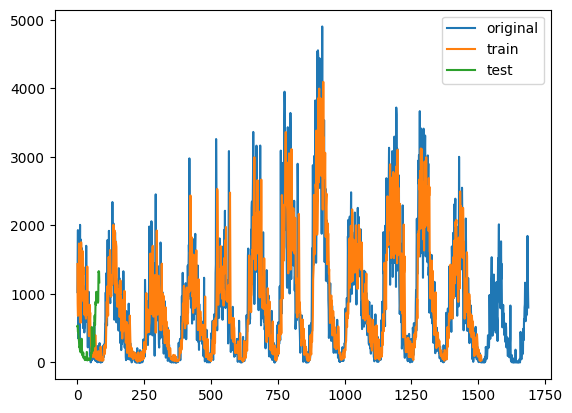

In [137]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(np.array(data[100:]),label='original')
plt.plot(train_predict,label='train')
plt.plot(test_predict,label='test')
plt.legend()
plt.show()

In [138]:
test = np.vstack((train_predict,test_predict))

In [139]:
data1=data[100:]

In [140]:
date=pd.Series(pd.period_range("1/9/1882", freq="M", periods=len(data1)))

In [141]:
test=test.flatten()

In [142]:
data_scaled1=data[100:]

In [143]:
DF = pd.DataFrame()
DF['original'] = data_scaled1
DF = DF.set_index(date)

In [144]:
DF1=pd.DataFrame()
DF1['predicted']=test
DF1 = DF1.set_index(date[:-92])

In [145]:
new = pd.concat([DF, DF1], ignore_index=False, axis=1)

In [146]:
new.head()

,original,predicted
1882-01,1026.9,1436.274000
1882-02,1393.8,859.662667
1882-03,1931.1,679.865333
1882-04,352.9,690.782333
1882-05,849.8,970.303333


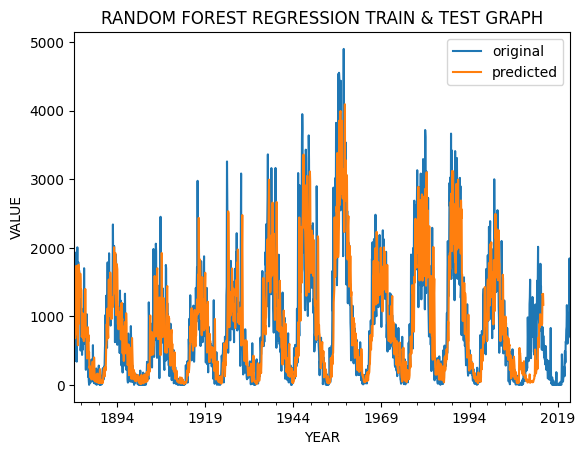

In [147]:
new.plot()
plt.title('RANDOM FOREST REGRESSION TRAIN & TEST GRAPH',color='black')
plt.xlabel('YEAR',color='black')
plt.ylabel('VALUE',color='black')
plt.savefig('RF_train_test.png')

In [148]:
len(test_predict),len(val_y)

(83, 83)

In [149]:
len(data)

1788

In [150]:
data_n=data[:1759]

In [151]:
data_n.tail

<bound method NDFrame.tail of               Area
DATE              
1874-05-01   365.1
1874-06-01   415.2
1874-07-01  1033.5
1874-08-01   954.1
1874-09-01   335.3
...            ...
2020-07-01    44.5
2020-08-01    36.1
2020-09-01     0.9
2020-10-01    91.7
2020-11-01   446.4

[1759 rows x 1 columns]>

In [152]:
import numpy as np

t_df = np.array(data_n).reshape(-1,1)

In [153]:
len(t_df)

1759

In [154]:
fut_inp = t_df[1663:]

In [155]:
fut_inp = fut_inp.reshape(1,-1)

In [156]:
tmp_inp = list(fut_inp)

In [157]:
fut_inp.shape

(1, 96)

In [158]:
tmp_inp = tmp_inp[0].tolist()

In [159]:
predictions

array([[ 527.40333333],
       [ 539.88433333],
       [ 448.62933333],
       [ 468.14966667],
       [ 408.83866667],
       [ 353.45066667],
       [ 305.66833333],
       [ 225.38366667],
       [ 231.99633333],
       [ 198.737     ],
       [ 172.91533333],
       [ 319.38933333],
       [ 147.03033333],
       [ 160.384     ],
       [ 230.31633333],
       [ 291.42566667],
       [ 345.909     ],
       [ 197.19      ],
       [ 138.96466667],
       [ 102.48166667],
       [ 147.21333333],
       [ 112.452     ],
       [ 141.93433333],
       [  66.10733333],
       [  78.51266667],
       [  57.67866667],
       [  78.832     ],
       [  81.92966667],
       [  34.74933333],
       [  39.45866667],
       [  49.30066667],
       [  48.863     ],
       [  40.08166667],
       [  66.53866667],
       [  49.52233333],
       [ 153.352     ],
       [ 150.04033333],
       [  30.31066667],
       [  43.69433333],
       [  42.432     ],
       [  57.033     ],
       [  58.538

In [160]:
lst_output=[]
n_steps=96
i=0
while(i<133):

    if(len(tmp_inp)>96):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape(( 1,n_steps))
        yhat = best_model.predict(fut_inp).reshape(-1,1)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps))
        yhat = best_model.predict(fut_inp).reshape(-1,1)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[[517.028333333333], [598.2256666666664], [734.3013333333332], [765.0983333333328], [879.9583333333326], [940.3536666666666], [915.9406666666662], [874.1099999999992], [902.9166666666661], [950.4936666666664], [976.1456666666663], [986.4460000000006], [921.2576666666661], [911.5953333333326], [996.4983333333328], [1015.307333333333], [1067.5666666666657], [1189.5876666666672], [1145.2913333333338], [1158.8143333333326], [1224.3970000000006], [1214.0666666666666], [1198.4446666666663], [1206.7323333333334], [1220.6143333333341], [1262.8260000000002], [1537.7373333333337], [1546.8066666666662], [1571.199666666667], [1645.5150000000008], [1709.7960000000003], [1739.656000000001], [1734.0700000000013], [1667.2430000000006], [1776.205000000002], [1723.1310000000017], [1687.6343333333343], [1689.418666666668], [1814.9480000000028], [1624.098000000002], [1619.2800000000009], [1589.6893333333353], [1756.763333333334], [1635.2466666666683], [1643.324000000001], [1628.8210000000015], [1582.04533

In [161]:
lst_output

[[517.028333333333],
 [598.2256666666664],
 [734.3013333333332],
 [765.0983333333328],
 [879.9583333333326],
 [940.3536666666666],
 [915.9406666666662],
 [874.1099999999992],
 [902.9166666666661],
 [950.4936666666664],
 [976.1456666666663],
 [986.4460000000006],
 [921.2576666666661],
 [911.5953333333326],
 [996.4983333333328],
 [1015.307333333333],
 [1067.5666666666657],
 [1189.5876666666672],
 [1145.2913333333338],
 [1158.8143333333326],
 [1224.3970000000006],
 [1214.0666666666666],
 [1198.4446666666663],
 [1206.7323333333334],
 [1220.6143333333341],
 [1262.8260000000002],
 [1537.7373333333337],
 [1546.8066666666662],
 [1571.199666666667],
 [1645.5150000000008],
 [1709.7960000000003],
 [1739.656000000001],
 [1734.0700000000013],
 [1667.2430000000006],
 [1776.205000000002],
 [1723.1310000000017],
 [1687.6343333333343],
 [1689.418666666668],
 [1814.9480000000028],
 [1624.098000000002],
 [1619.2800000000009],
 [1589.6893333333353],
 [1756.763333333334],
 [1635.2466666666683],
 [1643.3240

In [162]:
n_steps=96

X1,y1=prepare_data(t_df,n_steps)

In [163]:
X1.shape

(1663, 96, 1)

In [164]:
arr = np.array([X1])

X1 = arr.reshape(1663, 96)

In [165]:
train_p=best_model.predict(X1).reshape(-1,1)

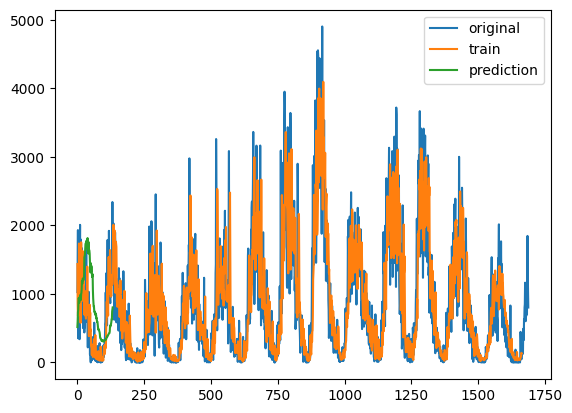

In [166]:
plt.plot(np.array(data[100:]),label='original')
plt.plot(train_p,label='train')
plt.plot(lst_output,label='prediction')
plt.legend()
plt.show()

In [167]:
type(train_p)

numpy.ndarray

In [168]:

test = np.vstack((train_p,lst_output))

In [169]:
test=test.flatten()

In [170]:
data_n = np.array(data_n).reshape(-1,1)

In [171]:
data_scaled2 = data_n[100:]

In [172]:
date=pd.Series(pd.period_range("1/9/1882", freq="M", periods=len(data_scaled1)+133))

In [173]:
DF = pd.DataFrame()
DF['original'] = data_scaled1
DF = DF.set_index(date[:-133])

In [174]:
DF1=pd.DataFrame()
DF1['predicted']=test
DF1 = DF1.set_index(date[:-25])

In [175]:
new = pd.concat([DF, DF1], ignore_index=False, axis=1)

In [176]:
new

,original,predicted
1882-01,1026.9,1436.274000
1882-02,1393.8,859.662667
1882-03,1931.1,679.865333
1882-04,352.9,690.782333
1882-05,849.8,970.303333
...,...,...
2031-04,NaN,631.246000
2031-05,NaN,629.218333
2031-06,NaN,744.924667
2031-07,NaN,770.102667


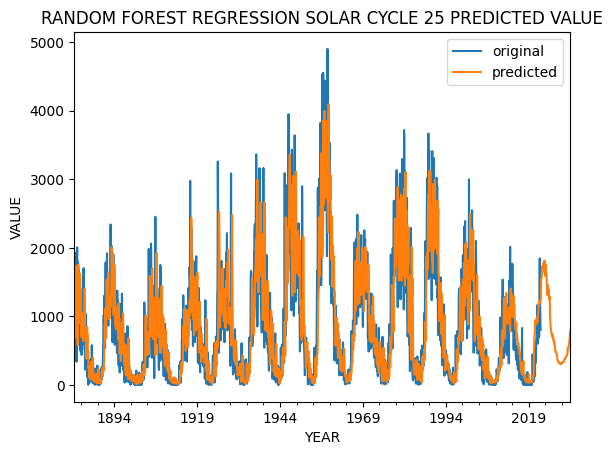

In [177]:
new.plot()
plt.title('RANDOM FOREST REGRESSION SOLAR CYCLE 25 PREDICTED VALUE',color='black')
plt.xlabel('YEAR',color='black')
plt.ylabel('VALUE',color='black')
plt.savefig('RF_predict.png')

In [178]:
print("Largest element is:", max(lst_output))

Largest element is: [1814.9480000000028]


In [179]:
i=max(lst_output)
time=int(np.where(np.array(lst_output) == i)[0])
time

38

In [180]:
new_date = np.datetime64('2020-11') + np.timedelta64(time, 'M')
print('Peak month is : '+str(new_date))


Peak month is : 2024-01
